<a href="https://colab.research.google.com/github/JustynaGoc/machine-learning-bootcamp/blob/main/03_Regresja_liniowa_w_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
#ustawienia  drukowania
np.set_printoptions(precision = 6, suppress = True, edgeitems = 30,  linewidth = 120, formatter= dict(float = lambda x: f'{x:2f}'))
sns.set(font_scale=1.3)
sklearn.__version__

'1.6.1'

Wygenerowanie danych

In [2]:
from sklearn.datasets import make_regression
#funkcja generujaca dane dla  modelu - zwraca dane oraz target - brak koniecznoscni formatowania dancyh
data, target = make_regression(n_samples  = 100, n_features= 1, n_targets=1,noise=30.0, random_state=42)


In [3]:
data[:5]

array([[0.931280],
       [0.087047],
       [-1.057711],
       [0.314247],
       [-0.479174]])

In [4]:
target[:5]

array([74.594475, -37.462691, -16.455140, 5.346170, -13.212612])

In [5]:
print(f'Data shape: {data.shape}')
print(f'Target shape: {target.shape}')

Data shape: (100, 1)
Target shape: (100,)


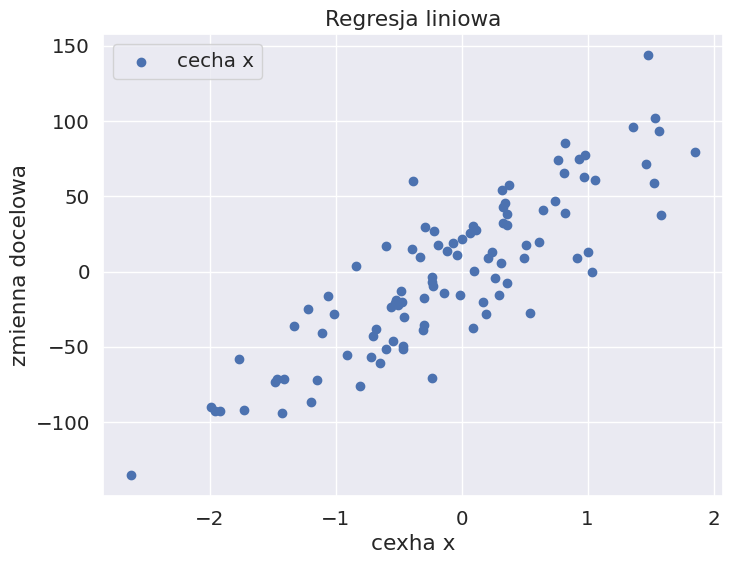

In [6]:
plt.figure(figsize =(8,6))
plt.title("Regresja liniowa")
plt.xlabel("cexha x")
plt.ylabel("zmienna docelowa")
plt.scatter(data, target, label = "cecha x")
plt.legend()
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression
regressor  = LinearRegression()
regressor.fit(data,target)

LinearRegression()

In [8]:
regressor.intercept_

np.float64(3.4953459615809184)

In [9]:
regressor.coef_

array([49.829309])

In [10]:
#wskaznik oceny modelu,  r2 score, im blizej  1 tym bardziej dopasowany model

regressor.score(data, target)

0.7426670084336404

In [11]:
# metoda predict() dokonuje predykcji na podstawie modelu
y_pred = regressor.predict(data)
y_pred


array([49.900391, 7.832841, -49.209659, 19.154074, -20.381575, 35.769218, -19.596438, 30.530738, 33.974753, 53.500697,
       44.450180, 80.134646, 40.292626, -7.450752, -36.791332, 8.067722, -94.153663, 29.071108, 54.869340, -127.044743,
       28.246269, 8.332653, -19.711646, 49.109201, 81.460459, 76.527612, -26.434065, 1.710159, -26.487279, -56.110804,
       21.290019, 22.216119, 16.503550, -22.902239, -41.750867, 13.304805, -11.403984, 21.515419, 44.482191,
       -11.039552, 21.503439, -30.235210, 79.386872, -22.329701, -8.172355, -16.043132, -11.508443, -28.650526,
       19.876787, 13.902875, -12.831833, 3.750146, -8.171537, 77.137785, -15.693038, 20.617608, 20.001974, -5.755913,
       -8.193969, -95.543840, 19.644226, -7.754931, -51.632562, -31.487475, -69.430593, 51.762257, -82.456118,
       -91.842087, -24.523053, 41.736088, 43.982947, -66.878772, -70.178384, -57.338450, -38.322284, 82.186430,
       52.106086, 15.552159, 18.250815, -23.630869, -84.355727, 9.022542, 12.034

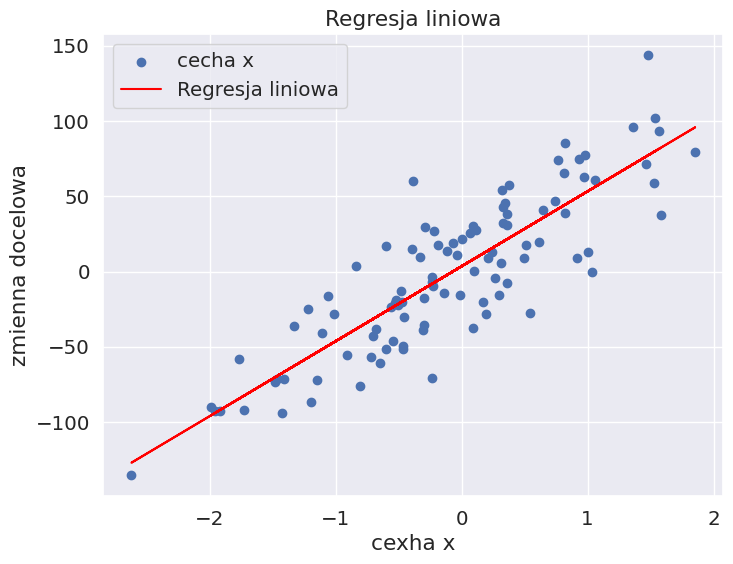

In [12]:
plt.figure(figsize =(8,6))
plt.title("Regresja liniowa")
plt.xlabel("cexha x")
plt.ylabel("zmienna docelowa")
plt.scatter(data, target, label = "cecha x")
plt.plot(data, y_pred, color = 'red', label = 'Regresja liniowa')
plt.legend()
plt.show()

In [13]:
[item for item in dir(regressor) if not item.startswith("_")]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_fit_request',
 'set_params',
 'set_score_request',
 'singular_']

In [14]:
regressor.intercept_

np.float64(3.4953459615809184)

In [15]:
regressor.coef_

array([49.829309])

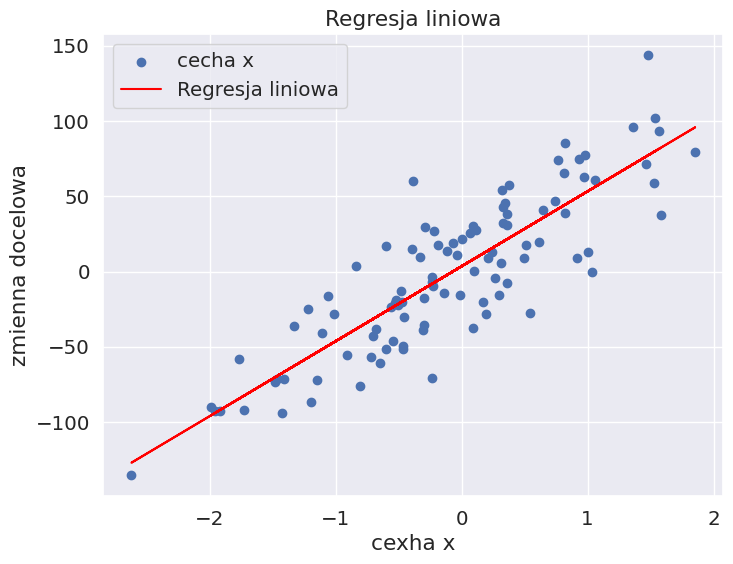

In [16]:
plt.figure(figsize =(8,6))
plt.title("Regresja liniowa")
plt.xlabel("cexha x")
plt.ylabel("zmienna docelowa")
plt.scatter(data, target, label = "cecha x")
plt.plot(data,regressor.intercept_ +  regressor.coef_ * data, color = 'red', label = 'Regresja liniowa')
plt.legend()
plt.show()

Regresja z podzialem na zbior treningowy oraz  testowy

In [17]:
data , target = make_regression(n_samples = 1000, n_features=1, n_targets=1, noise = 15.0, random_state=42)
print(f'Data shape: {data.shape}')
print(f'Target shape: {target.shape}')

Data shape: (1000, 1)
Target shape: (1000,)


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (750, 1)
x_test shape: (250, 1)
y_train shape: (750,)
y_test shape: (250,)


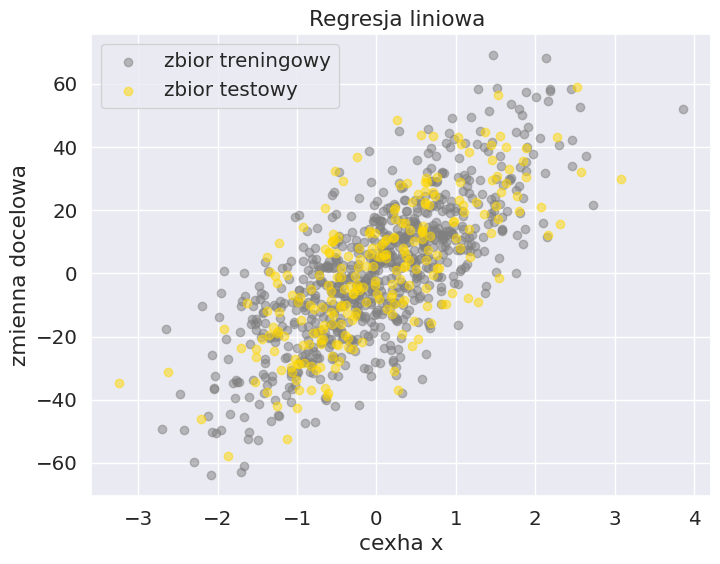

In [19]:
plt.figure(figsize =(8,6))
plt.title("Regresja liniowa ")
plt.xlabel("cexha x")
plt.ylabel("zmienna docelowa")
plt.scatter(x_train , y_train , label = "zbior treningowy", color  = "gray", alpha=0.5)
plt.scatter(x_test  , y_test , label = "zbior testowy", color  = "gold", alpha=0.5)
plt.legend()
plt.show()

In [20]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [21]:
regressor.score(x_train, y_train)

0.5550440098049001

In [22]:
regressor.score(x_test, y_test)

0.5108438585354155

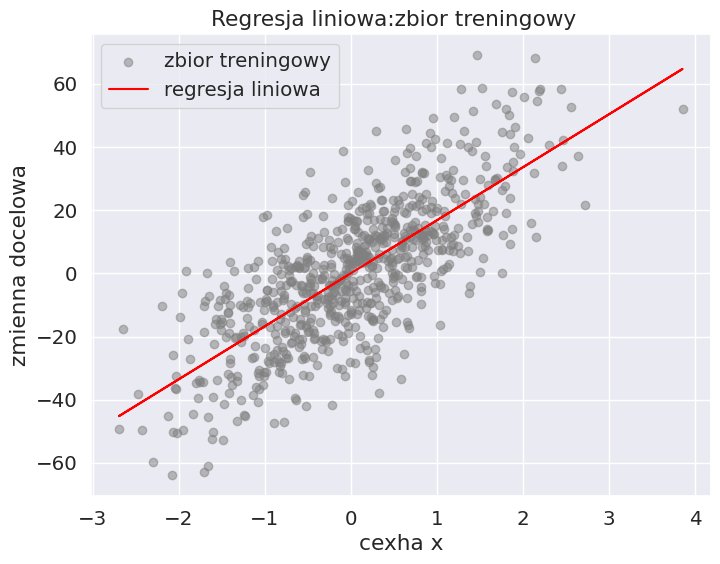

In [25]:
plt.figure(figsize =(8,6))
plt.title("Regresja liniowa:zbior treningowy  ")
plt.xlabel("cexha x")
plt.ylabel("zmienna docelowa")
plt.scatter(x_train , y_train , label = "zbior treningowy", color  = "gray", alpha=0.5)
plt.plot(x_train  , regressor.intercept_ + regressor.coef_[0] * x_train, label = "regresja liniowa", color  = "red")
plt.legend()
plt.show()

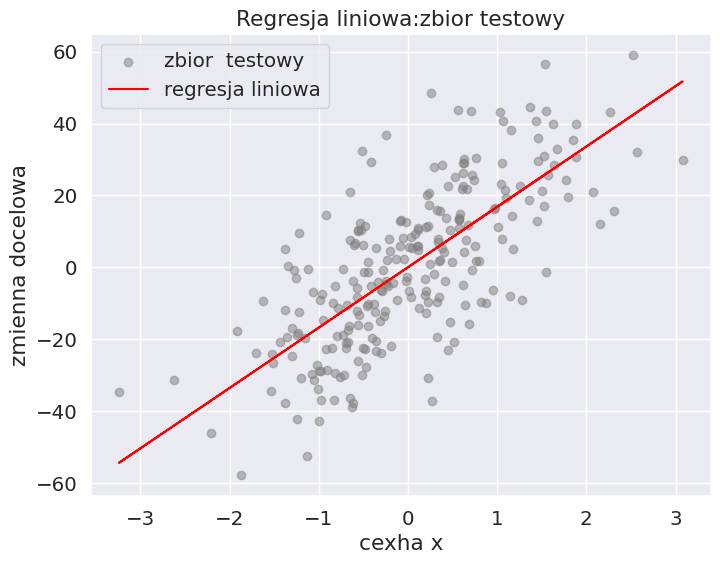

In [27]:
plt.figure(figsize =(8,6))
plt.title("Regresja liniowa:zbior testowy")
plt.xlabel("cexha x")
plt.ylabel("zmienna docelowa")
plt.scatter(x_test , y_test , label = "zbior  testowy", color  = "gray", alpha=0.5)
plt.plot(x_test  , regressor.intercept_ + regressor.coef_[0] * x_test, label = "regresja liniowa", color  = "red")
plt.legend()
plt.show()

predykcja na podstawie modelu

In [28]:
y_pred = regressor.predict(x_test)

In [30]:
predictions =  pd.DataFrame({"y_test": y_test,  "y_pred": y_pred})
predictions.head()

,y_test,y_pred
0,30.876983,25.601338
1,1.850537,5.954600
2,30.604981,31.624589
3,-9.092543,-16.490844
4,-36.311708,-10.800495


In [31]:
predictions["error"]= predictions["y_test"] -predictions['y_pred']
predictions.head()

,y_test,y_pred,error
0,30.876983,25.601338,5.275646
1,1.850537,5.954600,-4.104063
2,30.604981,31.624589,-1.019608
3,-9.092543,-16.490844,7.398301
4,-36.311708,-10.800495,-25.511212


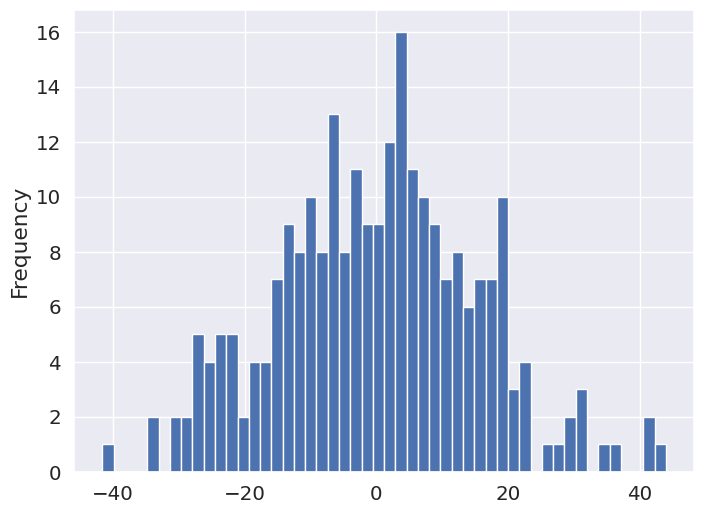

In [32]:
_ = predictions.error.plot(kind = "hist", bins = 50, figsize= (8,6))